### Answers to Assignment 7 of 230E

##### Authors(alphabetic order)
1) Ishan Pathak ishan_pathak@berkeley.edu
2) Leonid Maksymenko leo.maksymenko@berkeley.edu
3) Nymph Qiu nymph_qiu@berkeley.edu
4) Xuanzhong Ren rxz19@berkeley.edu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import durbin_watson

### Q1

#### (a)

In [2]:
raw_data = pd.read_csv("PS7_LP_Portfolios.csv", header=[0,1])
raw_data.index = raw_data[('Unnamed: 0_level_0', 'date')]
raw_data = raw_data.drop(columns=[('Unnamed: 0_level_0', 'date')])
name = ""
cols = []
for i, j in raw_data.columns:
    if 'Unnamed' in i:
        cols.append((name, j))
    else:
        name = i
        cols.append((name, j))
raw_data.columns = cols

In [3]:
data = raw_data.copy(deep=True)
print("Durbin Watson Test")
for col in data.columns:
    print(col, durbin_watson(data[col]))

Durbin Watson Test
('accruals', 'p1') 1.7991989057554094
('accruals', 'p2') 1.842227256774109
('accruals', 'p3') 1.7713293351768005
('accruals', 'p4') 1.7766316383296932
('accruals', 'p5') 1.8651487925880115
('accruals', 'p6') 1.8322718555926856
('accruals', 'p7') 1.8233385268736415
('accruals', 'p8') 1.9068150010382392
('accruals', 'p9') 1.8149563795600123
('accruals', 'p10') 1.815756510518983
('aturnover', 'p1') 1.8330513213383104
('aturnover', 'p2') 1.8169275827055629
('aturnover', 'p3') 1.95950547826543
('aturnover', 'p4') 1.8275300846847238
('aturnover', 'p5') 1.793536919116392
('aturnover', 'p6') 1.8009458481532024
('aturnover', 'p7') 1.7924529933849047
('aturnover', 'p8') 1.8214590668938657
('aturnover', 'p9') 1.656358618521396
('aturnover', 'p10') 1.686411483401215
('cfp', 'p1') 1.7996953759420775
('cfp', 'p2') 1.8120683729041647
('cfp', 'p3') 1.8112303480555405
('cfp', 'p4') 1.7918596127188626
('cfp', 'p5') 1.8072601016436678
('cfp', 'p6') 1.8018874361468584
('cfp', 'p7') 1.77

We could see that the excess returns autocorrelation at lag=1 is close to 0 for which they are stationary.

<Axes: >

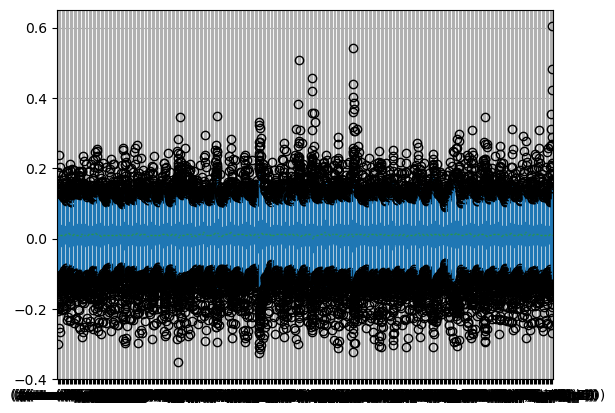

In [4]:
data.boxplot()

We could see that data is concentrated between -0.2 and 0.2 and there is little portion of outliers.

#### (b)

In [5]:
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
ff_3_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start='1963-11-1', end='2017-12-31')[0].reset_index()
ff_5_factor = web.DataReader('F-F_Research_Data_5_Factors_2x3', 'famafrench', start='1963-11-1', end='2017-12-31')[0].reset_index()

/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_26611/806907247.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_3_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start='1963-11-1', end='2017-12-31')[0].reset_index()
/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_26611/806907247.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_3_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start='1963-11-1', end='2017-12-31')[0].reset_index()
/var/folders/z1/63t9r5_d2vq7tf0245y_z8qr0000gn/T/ipykernel_26611/806907247.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please

In [6]:
def calc_ols_pricing_error(excess_return, ff_factors):
    y = excess_return.copy(deep=True).reset_index(drop=True)
    x = ff_factors.copy(deep=True).drop(columns=["RF", "Date"]).reset_index(drop=True)
    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    results = model.fit()
    return results.params["const"], results.pvalues["const"]
ff_pricing_errors = {"portfolio":[],"alpha_ff3":[],"alpha_ff3_pval":[],"alpha_ff5":[], "alpha_ff5_pval":[]}
for col in list(data.columns):
    ff_pricing_errors["portfolio"].append(col)
    param, pval = calc_ols_pricing_error(data[col], ff_3_factor)
    ff_pricing_errors["alpha_ff3"].append(param)
    ff_pricing_errors["alpha_ff3_pval"].append(pval)
    param, pval = calc_ols_pricing_error(data[col], ff_5_factor)
    ff_pricing_errors["alpha_ff5"].append(param)     
    ff_pricing_errors["alpha_ff5_pval"].append(pval)
ff_pricing_errors = pd.DataFrame(data=ff_pricing_errors)
ff_pricing_errors

,portfolio,alpha_ff3,alpha_ff3_pval,alpha_ff5,alpha_ff5_pval
0,"(accruals, p1)",0.001164,1.430432e-01,0.001851,1.934118e-02
1,"(accruals, p2)",0.003531,2.753121e-06,0.003797,6.768938e-07
2,"(accruals, p3)",0.003003,6.708499e-06,0.002544,1.537149e-04
3,"(accruals, p4)",0.004305,5.561027e-11,0.003029,1.626521e-06
4,"(accruals, p5)",0.004838,4.107241e-14,0.003573,5.093028e-09
...,...,...,...,...,...
365,"(valueem, p6)",0.002941,1.451690e-04,0.002388,2.420351e-03
366,"(valueem, p7)",0.004036,2.272438e-07,0.003748,2.791963e-06
367,"(valueem, p8)",0.003273,8.908028e-05,0.003080,3.309080e-04
368,"(valueem, p9)",0.005635,3.506965e-07,0.005828,2.984409e-07


In [7]:
ff_pricing_errors.describe()

,alpha_ff3,alpha_ff3_pval,alpha_ff5,alpha_ff5_pval
count,370.000000,3.700000e+02,370.000000,3.700000e+02
mean,0.004060,2.474785e-02,0.003690,1.903370e-02
std,0.001786,1.059198e-01,0.001601,9.603603e-02
min,-0.006985,2.665268e-64,-0.004043,4.999520e-62
25%,0.003339,6.906876e-14,0.002828,1.155839e-10
50%,0.004163,9.240252e-10,0.003680,1.796308e-07
75%,0.004999,6.833714e-06,0.004385,1.397286e-04
max,0.010759,8.329983e-01,0.009629,9.149302e-01


We could see that there is a big portion - around 75% of alphas(pricing errors) which are significant at 1%.

#### (c)
covariance matrix

In [8]:
cov_eigval, cov_eigvec = np.linalg.eig(data.cov())
X = np.array(data)
PC_cov = np.dot(X, cov_eigvec)
PC_cov_cov = np.cov(PC_cov.T)
for i in range(len(PC_cov_cov)):
    print(f"PC{i+1} variance=",PC_cov_cov[i,i])

PC1 variance= 0.7366721286625458
PC2 variance= 0.024660265071438297
PC3 variance= 0.01913590757754602
PC4 variance= 0.013014786696058095
PC5 variance= 0.004894249512003902
PC6 variance= 0.0037104728299223273
PC7 variance= 0.0033872832869614278
PC8 variance= 0.003009687963552272
PC9 variance= 0.002532058154307066
PC10 variance= 0.0023394237715518153
PC11 variance= 0.0019695016894609152
PC12 variance= 0.0019151651401005752
PC13 variance= 0.001895595542837188
PC14 variance= 0.0015899916534227003
PC15 variance= 0.0015375373300945136
PC16 variance= 0.001437248479587253
PC17 variance= 0.0013913494754344681
PC18 variance= 0.0013391877758364905
PC19 variance= 0.0012459271184698901
PC20 variance= 0.0011228498793420232
PC21 variance= 0.0011048536437357796
PC22 variance= 0.0010966484858883335
PC23 variance= 0.0010387528106581263
PC24 variance= 0.0010245719144692529
PC25 variance= 0.0009680460506342936
PC26 variance= 0.0009240650415281815
PC27 variance= 0.0009130704886941171
PC28 variance= 0.00089

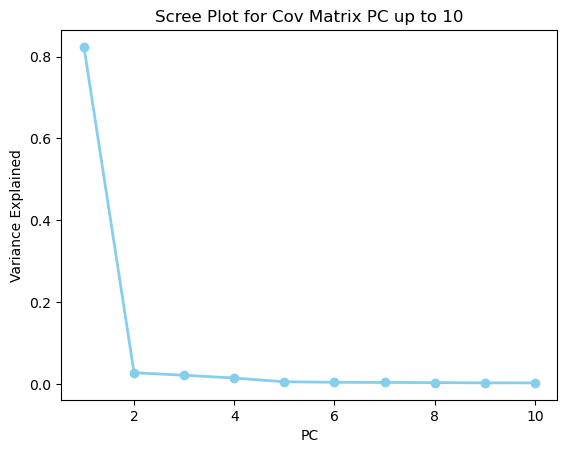

In [9]:
plt.plot(list(range(1,11)), cov_eigval[:10]/sum(cov_eigval), 'o-', linewidth=2, color='skyblue')
plt.title('Scree Plot for Cov Matrix PC up to 10')
plt.xlabel('PC')
plt.ylabel('Variance Explained')
plt.show()

correlation matrix

In [10]:
cor_eigval, cor_eigvec = np.linalg.eig(data.corr())
for idx in range(len(cor_eigvec)):
    cor_eigvec[:,idx] = cor_eigvec[:,idx]
PC_cor = np.dot(X, cor_eigvec)
PC_cor_cov = np.cov(PC_cor.T)
for i in range(len(PC_cor_cov)):
    print(f"PC{i+1} variance=",PC_cor_cov[i,i])

PC1 variance= 0.7198110650609686
PC2 variance= 0.031347994333558366
PC3 variance= 0.024218428745840095
PC4 variance= 0.013160436528051236
PC5 variance= 0.005099405796521065
PC6 variance= 0.0038238961672864774
PC7 variance= 0.0037080367576441246
PC8 variance= 0.0028505177689249245
PC9 variance= 0.0025322458510532537
PC10 variance= 0.0024857560361484215
PC11 variance= 0.0019058132352140292
PC12 variance= 0.0020994676098881485
PC13 variance= 0.0018015830826748538
PC14 variance= 0.0017105278742571828
PC15 variance= 0.0015801402721790617
PC16 variance= 0.001479611630693709
PC17 variance= 0.001290210785157439
PC18 variance= 0.0014220860507638514
PC19 variance= 0.0013837383661856545
PC20 variance= 0.0011147456730867323
PC21 variance= 0.0010939492028650315
PC22 variance= 0.0011005756504332486
PC23 variance= 0.001061660389807046
PC24 variance= 0.000982328628333596
PC25 variance= 0.0009211450321691467
PC26 variance= 0.0009385791692676969
PC27 variance= 0.0009425905509899461
PC28 variance= 0.0008

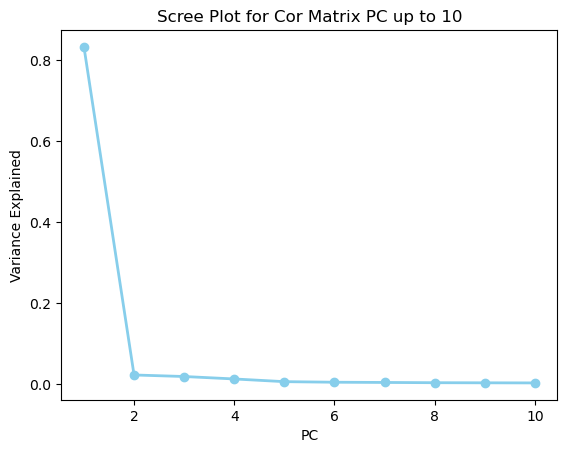

In [11]:
plt.plot(list(range(1,11)), cor_eigval[:10]/sum(cor_eigval), 'o-', linewidth=2, color='skyblue')
plt.title('Scree Plot for Cor Matrix PC up to 10')
plt.xlabel('PC')
plt.ylabel('Variance Explained')
plt.show()

We could observe that scree plots of covariance and correlation matrix decomposition are nearly the same, which shows that correlation matrix and covariance matrix could work interchangeably during PCA transformation. This might be related to few outliers in the raw datasets for which they work the same. If there is a big number of outliers, correlation is more preferred.

#### (d)

In [12]:
from statsmodels.multivariate.pca import PCA
pca_data = np.array(data)
PCs_model = PCA(pca_data, method="eig", standardize=False)
var_explained_pca = PCs_model.eigenvals/sum(PCs_model.eigenvals)
var_explained_cov = cov_eigval/sum(cov_eigval)
np.sum((var_explained_pca - var_explained_cov)**2)

2.272132121580879e-07

In [13]:
var_explained_cor = cor_eigval/sum(cor_eigval)
PCs_model = PCA(pca_data, method="eig", standardize=True)
var_explained_pca = PCs_model.eigenvals/sum(PCs_model.eigenvals)
np.sum((var_explained_pca - var_explained_cov)**2)

0.0001376041759521309

We could see that "standardize=True" for PCA is using correlation matrix while "standardize=False" is using covariance matrix and no matter whether standard PCA or our eigenvalue decomposition, they work the same

#### (e)

Scree plots(both covariance and correlation) show that PC1 explains more than 80% of variance so PC1 is needed for sure. And PC1-3 could contribute to 85% variance explained, which would suffice.

In [14]:
print("eigenvector for PC1")
print(np.mean(cor_eigvec[:,0]), np.std(cor_eigvec[:,0]))

eigenvector for PC1
0.05194781159209573 0.002031643053005989


In [15]:
print("eigenvector for PC2")
print(np.mean(cor_eigvec[:,1]), np.std(cor_eigvec[:,1]))

eigenvector for PC2
-0.00032971632129389034 0.05198647891375387


In [16]:
print("eigenvector for PC3")
print(np.mean(cor_eigvec[:,2]), np.std(cor_eigvec[:,2]))

eigenvector for PC3
0.0009987887193445063 0.051977929198812965


It is unclear for economic meanings of PC2 and PC3 but we could observe that PC1 is equal weighted average of excess returns across portfolios and characterstics.

#### (f)

##### PC1

In [17]:
def calc_ols_pricing_error_pca(excess_return, pca_factor):
    y = excess_return.copy(deep=True).reset_index(drop=True)
    x = pca_factor
    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    results = model.fit()
    return results.params["const"], results.pvalues["const"]
pca_factor = np.dot(np.array(data), cor_eigvec[:,0])
ff_pricing_errors = {"portfolio":[],"alpha_pca":[],"alpha_pca_pval":[]}
for col in list(data.columns):
    ff_pricing_errors["portfolio"].append(col)
    param, pval = calc_ols_pricing_error_pca(data[col], pca_factor)
    ff_pricing_errors["alpha_pca"].append(param)
    ff_pricing_errors["alpha_pca_pval"].append(pval)
ff_pricing_errors = pd.DataFrame(data=ff_pricing_errors)
ff_pricing_errors

,portfolio,alpha_pca,alpha_pca_pval
0,"(accruals, p1)",-0.005289,2.908160e-07
1,"(accruals, p2)",-0.002143,6.591751e-03
2,"(accruals, p3)",-0.001946,3.745617e-03
3,"(accruals, p4)",0.000149,8.122729e-01
4,"(accruals, p5)",0.000896,1.512208e-01
...,...,...,...
365,"(valueem, p6)",0.000082,9.144284e-01
366,"(valueem, p7)",0.001409,7.509112e-02
367,"(valueem, p8)",0.001390,1.219151e-01
368,"(valueem, p9)",0.003819,1.341735e-03


In [18]:
ff_pricing_errors.describe()

,alpha_pca,alpha_pca_pval
count,370.000000,3.700000e+02
mean,-0.000006,2.831609e-01
std,0.002180,3.128942e-01
min,-0.011994,4.547497e-15
25%,-0.000909,9.261178e-03
50%,0.000243,1.354252e-01
75%,0.001244,5.169251e-01
max,0.006853,9.998882e-01


We could observe that only a small portion - around 25% of alphas(pricing errors) are significant at 1%, which shows sharp constrast with FF factor models.

##### PC1 and PC2

In [19]:
pca_factor = np.dot(np.array(data), cor_eigvec[:,:2])
ff_pricing_errors = {"portfolio":[],"alpha_pca":[],"alpha_pca_pval":[]}
for col in list(data.columns):
    ff_pricing_errors["portfolio"].append(col)
    param, pval = calc_ols_pricing_error_pca(data[col], pca_factor)
    ff_pricing_errors["alpha_pca"].append(param)
    ff_pricing_errors["alpha_pca_pval"].append(pval)
ff_pricing_errors = pd.DataFrame(data=ff_pricing_errors)
ff_pricing_errors

,portfolio,alpha_pca,alpha_pca_pval
0,"(accruals, p1)",-0.002637,0.000514
1,"(accruals, p2)",-0.000879,0.223408
2,"(accruals, p3)",-0.001291,0.048902
3,"(accruals, p4)",-0.000197,0.754175
4,"(accruals, p5)",0.000251,0.679643
...,...,...,...
365,"(valueem, p6)",-0.000986,0.172948
366,"(valueem, p7)",0.000404,0.592090
367,"(valueem, p8)",0.000144,0.864678
368,"(valueem, p9)",0.002791,0.017210


In [20]:
ff_pricing_errors.describe()

,alpha_pca,alpha_pca_pval
count,370.000000,3.700000e+02
mean,0.000006,3.059022e-01
std,0.001757,2.992648e-01
min,-0.009891,1.404967e-12
25%,-0.000868,3.847432e-02
50%,-0.000002,1.990823e-01
75%,0.000839,5.183165e-01
max,0.007202,9.853356e-01


We could observe that only a small portion - less than 25% of alphas(pricing errors) are significant at 1%, which shows sharp constrast with FF factor models.

In [21]:
pca_factor = np.dot(np.array(data), cor_eigvec[:,:3])
ff_pricing_errors = {"portfolio":[],"alpha_pca":[],"alpha_pca_pval":[]}
for col in list(data.columns):
    ff_pricing_errors["portfolio"].append(col)
    param, pval = calc_ols_pricing_error_pca(data[col], pca_factor)
    ff_pricing_errors["alpha_pca"].append(param)
    ff_pricing_errors["alpha_pca_pval"].append(pval)
ff_pricing_errors = pd.DataFrame(data=ff_pricing_errors)
ff_pricing_errors

,portfolio,alpha_pca,alpha_pca_pval
0,"(accruals, p1)",-0.002633,0.000526
1,"(accruals, p2)",-0.000917,0.182093
2,"(accruals, p3)",-0.001321,0.036390
3,"(accruals, p4)",-0.000235,0.689023
4,"(accruals, p5)",0.000219,0.704503
...,...,...,...
365,"(valueem, p6)",-0.000941,0.162112
366,"(valueem, p7)",0.000465,0.482370
367,"(valueem, p8)",0.000225,0.746876
368,"(valueem, p9)",0.002917,0.001177


In [22]:
ff_pricing_errors.describe()

,alpha_pca,alpha_pca_pval
count,370.000000,3.700000e+02
mean,0.000007,2.855434e-01
std,0.001755,2.968998e-01
min,-0.009717,5.900796e-13
25%,-0.000890,2.644893e-02
50%,-0.000016,1.729268e-01
75%,0.000865,4.838775e-01
max,0.007226,9.933232e-01


We could observe that only a small portion - further less than 25% of alphas(pricing errors) are significant at 1%, which shows sharp constrast with FF factor models, and way better than PC1 only and PC1&PC2 models.

#### (g)

We could see that FF factor models have around 75% significant pricing errors of 370 portfolios while PCA models would have less than 25% significant pricing errors at 1% significance level. This shows that PCA could explain the excess returns in a better way.